In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from collections import namedtuple
import re
from itertools import chain
from os.path import isdir, join

In [3]:
import xmltodict
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('colorblind')

In [4]:
Alignment = namedtuple('Alignment', ['tx', 'ty', 'tz', 'rx', 'ry', 'rz'])

In [5]:
def parse_xml(fn):
    with open(fn, 'rt') as f:
        modules_xml = xmltodict.parse(f.read())
    
    alignment = {}
    for module in modules_xml['DDDB']['condition']:
        assert module['@classID'] == '6'
        module_number, = map(int, re.match('Module(\d+)', module['@name']).groups())
        tx, ty, tz, rx, ry, rz = [None]*6
        for param in module['paramVector']:
            if param['@name'] == 'dPosXYZ':
                tx, ty, tz = map(float, param['#text'].split(' '))
            elif param['@name'] == 'dRotXYZ':
                rx, ry, rz = map(float, param['#text'].split(' '))
            else:
                raise ValueError(param)
        assert None not in [tx, ty, tz, rx, ry, rz]
        alignment[module_number] = Alignment(tx, ty, tz, rx, ry, rz)
    return alignment

In [6]:
def plot_alignment(var, ax, title, fn):
    _bins, unit, scale = bins[var]
    params = parse_xml(fn)
    ax.hist([getattr(a, var)*scale for a in params.values()], bins=_bins, histtype='step', lw=1)
    ax.set_xlim(min(_bins), max(_bins))
    ax.set_xlabel(f'{title} - {var} [{unit}]')

In [7]:
def plot_hists(scenario, settings):
    module_fn = 'Conditions/VP/Alignment/Modules.xml'
    for var in bins:
        fig, axes = plt.subplots(2, 4, sharex='none', sharey='none', figsize=(12, 6))
        plot_alignment(var, axes[0][0], 'Initial', f'../output/scenarios/{scenario}/SIMCOND/{module_fn}')
        for i, ax in enumerate(list(chain(*axes))[1:]):
            align_xml_dir = f'{settings}/AlignmentResults/Iter{i}/xml/'
            if isdir(align_xml_dir):
                plot_alignment(var, ax, f'Iteration {i}', join(align_xml_dir, module_fn))
            else:
                print(f'Error - Skipped {scenario} {var} Iteration {i}')
        fig.suptitle(f'{scenario} - {settings} - {var}', y=1.02)
        plt.tight_layout()

In [8]:
def _view_alignment_scatter(xml_fn, label, var):
    _bins, unit, scale = bins[var]
    params = parse_xml(xml_fn)
    points = [(k, getattr(v, var)) for k, v in sorted(params.items(), key=lambda x: abs(x[1].tz), reverse=True)]
    xs, ys = map(np.array, zip(*points))
    plt.scatter(xs, ys*scale, label=label)

def view_alignment(scenario, settings, var='tz', n_iter=1, show_step_1=False):
    plt.figure()
    _bins, unit, scale = bins[var]
    module_fn = 'Conditions/VP/Alignment/Modules.xml'
    _view_alignment_scatter(f'../output/scenarios/{scenario}/SIMCOND/{module_fn}', 'Before', var)
    if show_step_1:
        _view_alignment_scatter(f'v5_2kevents_00-01-40-41_floatRy/AlignmentResults/Iter1/xml/{module_fn}', 'Step1', var)
    for i in range(n_iter):
        _view_alignment_scatter(f'{settings}/AlignmentResults/Iter{i}/xml/{module_fn}', f'Iteration {i}', var)
    plt.legend(loc='best', frameon=True)
    plt.title(f'{scenario} - {settings}')
    plt.xlabel('Module number')
    plt.ylabel(f'{var} residual [{unit}]')
    plt.ylim(_bins[0], _bins[-1])

In [9]:
bins = {
    'tx': (np.linspace(-105, 105, 22), 'μm', 1000),
    'ty': (np.linspace(-105, 105, 22), 'μm', 1000),
    'tz': (np.linspace(-1050, 1050, 22), 'μm', 1000),
    'rx': (np.linspace(-1.05, 1.05, 22), 'mrad', 1000),
    'ry': (np.linspace(-15.75, 15.75, 22), 'mrad', 1000),
    'rz': (np.linspace(-1.05, 1.05, 22), 'mrad', 1000),
}

# Examine $T_z$ and $R_y$

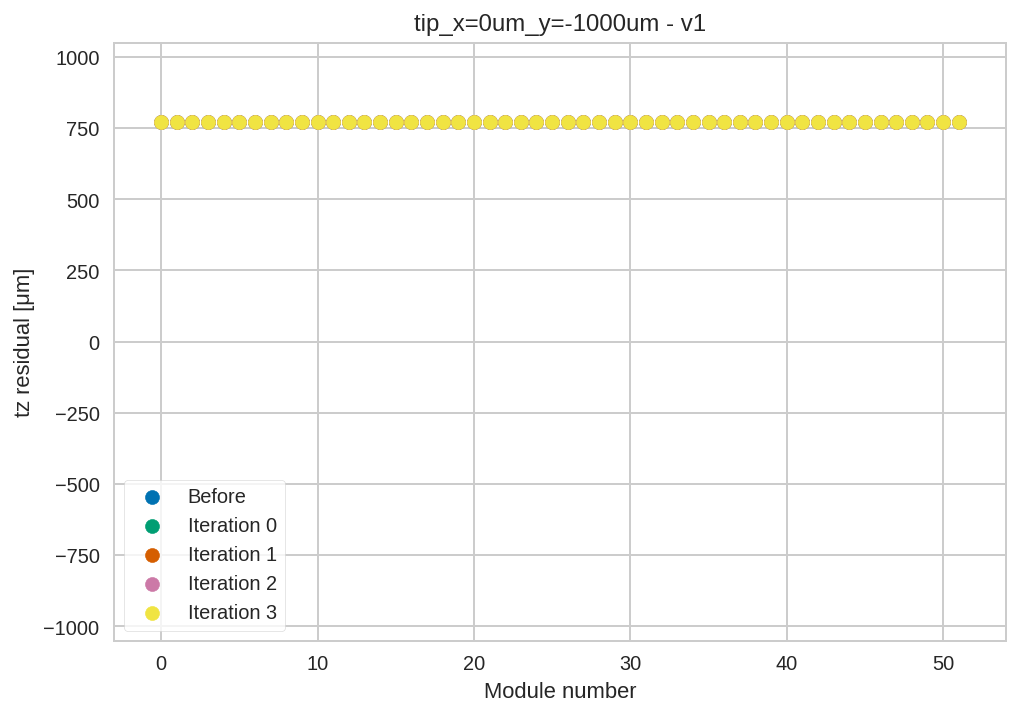

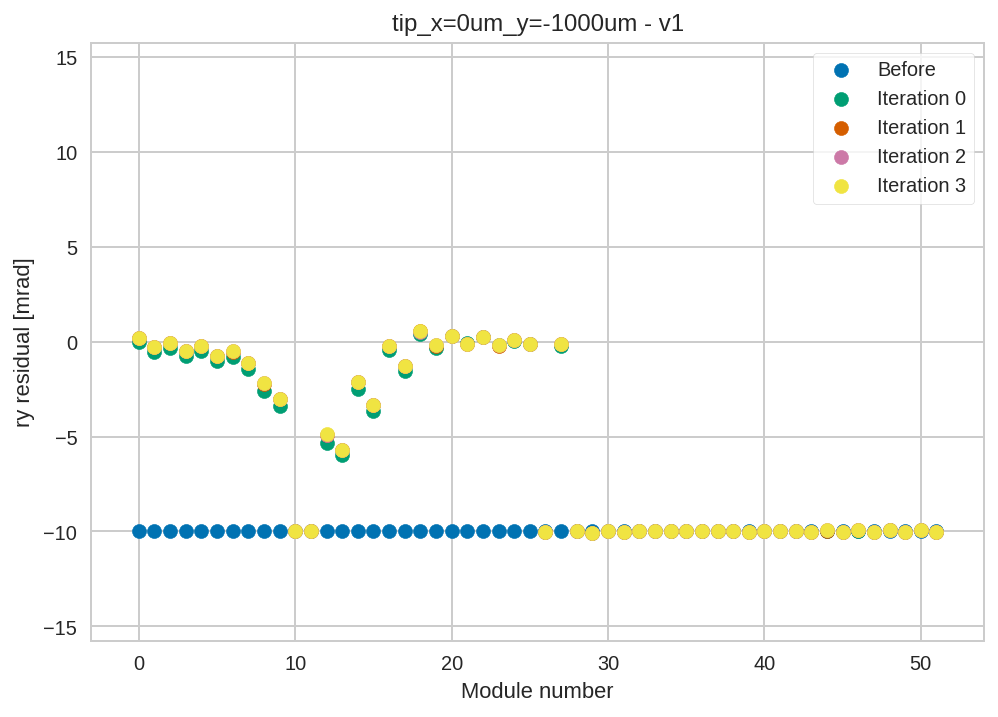

In [10]:
view_alignment('tip_x=0um_y=-1000um', 'v1', var='tz', n_iter=4)
view_alignment('tip_x=0um_y=-1000um', 'v1', var='ry', n_iter=4)

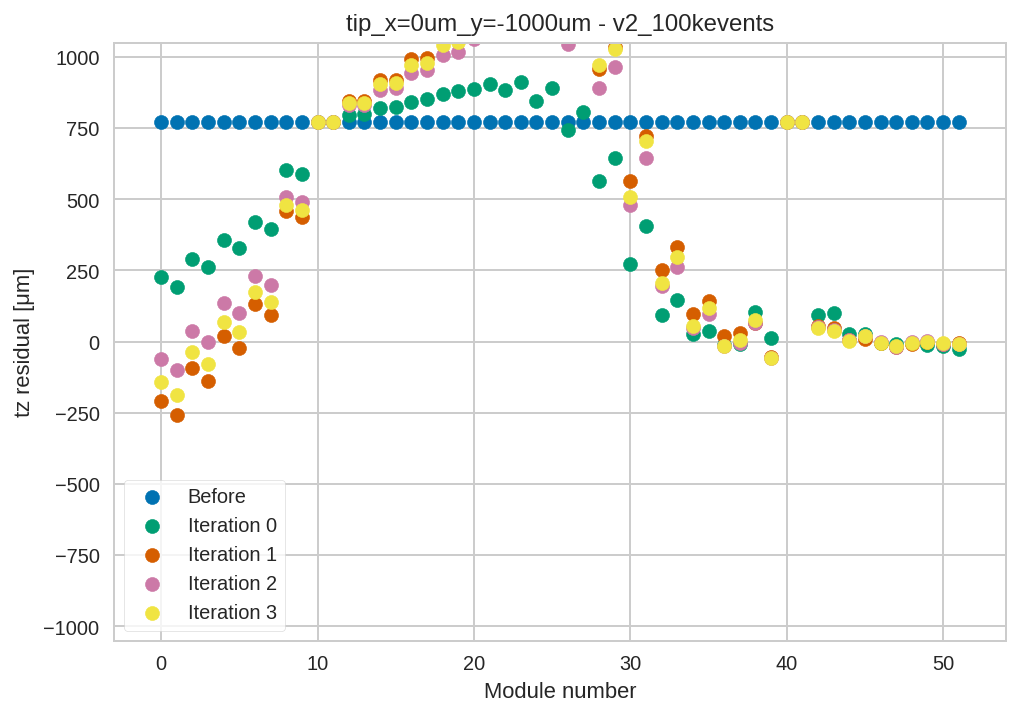

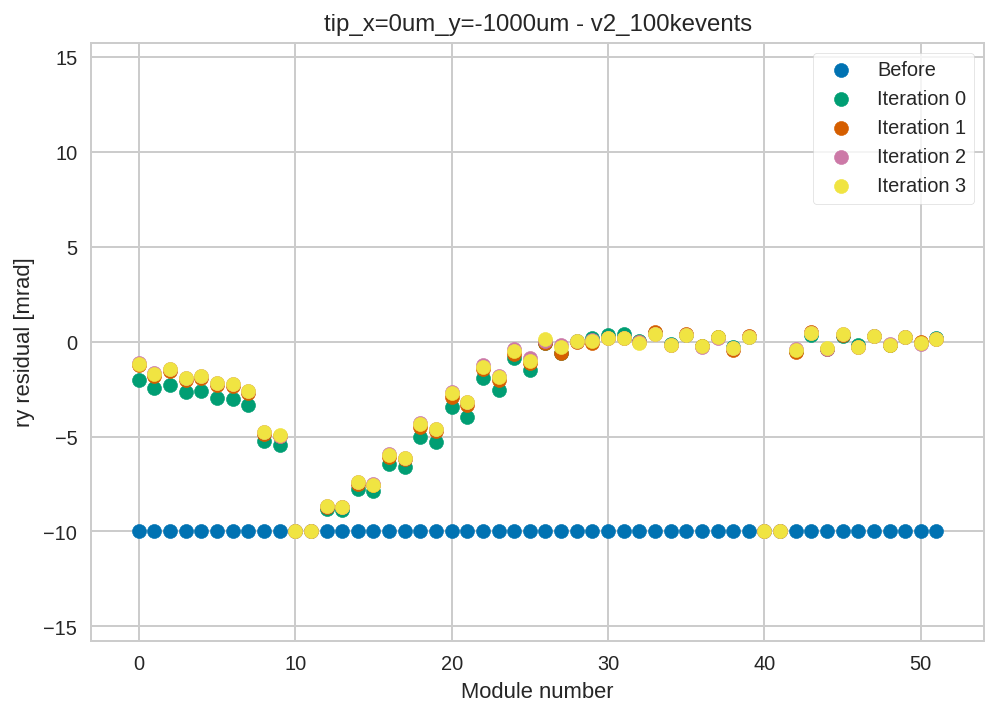

In [11]:
view_alignment('tip_x=0um_y=-1000um', 'v2_100kevents', var='tz', n_iter=4)
view_alignment('tip_x=0um_y=-1000um', 'v2_100kevents', var='ry', n_iter=4)

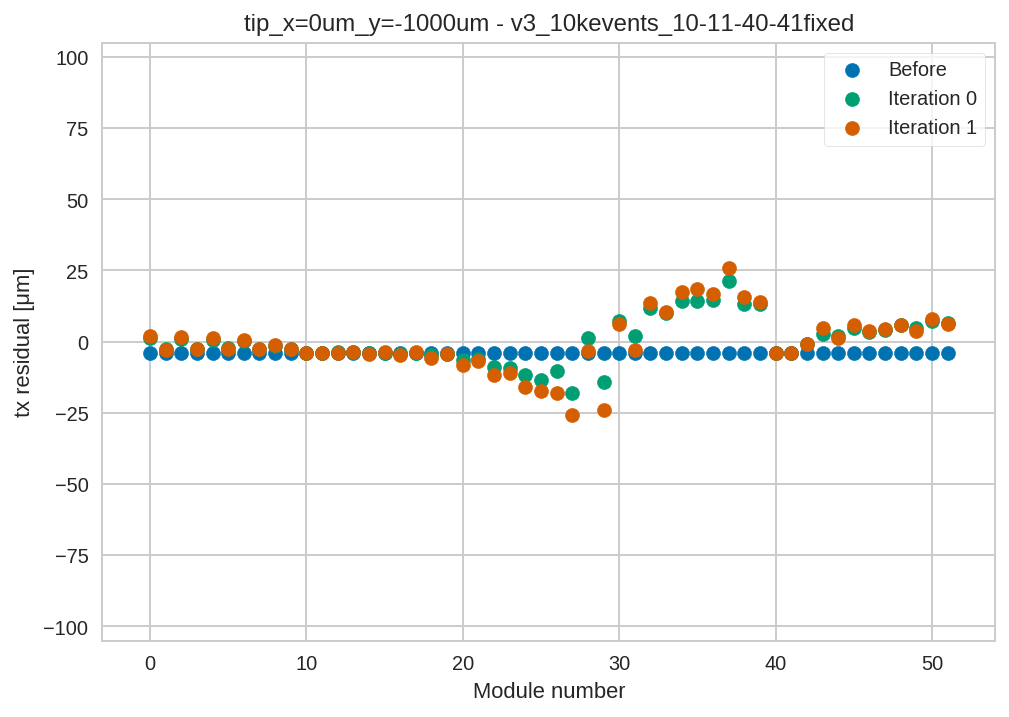

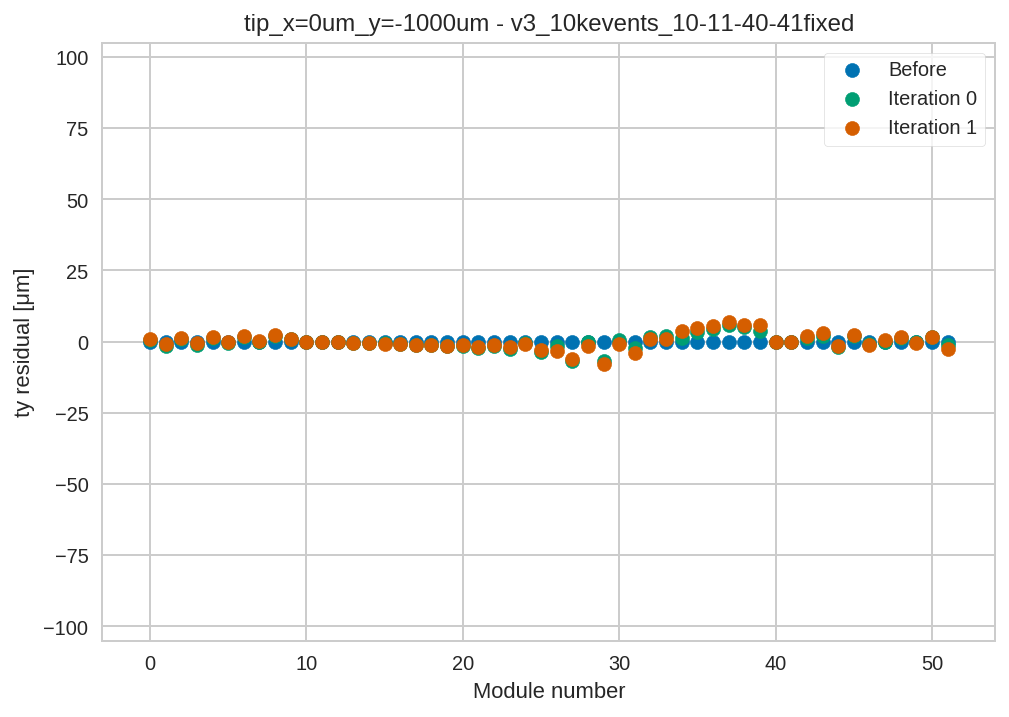

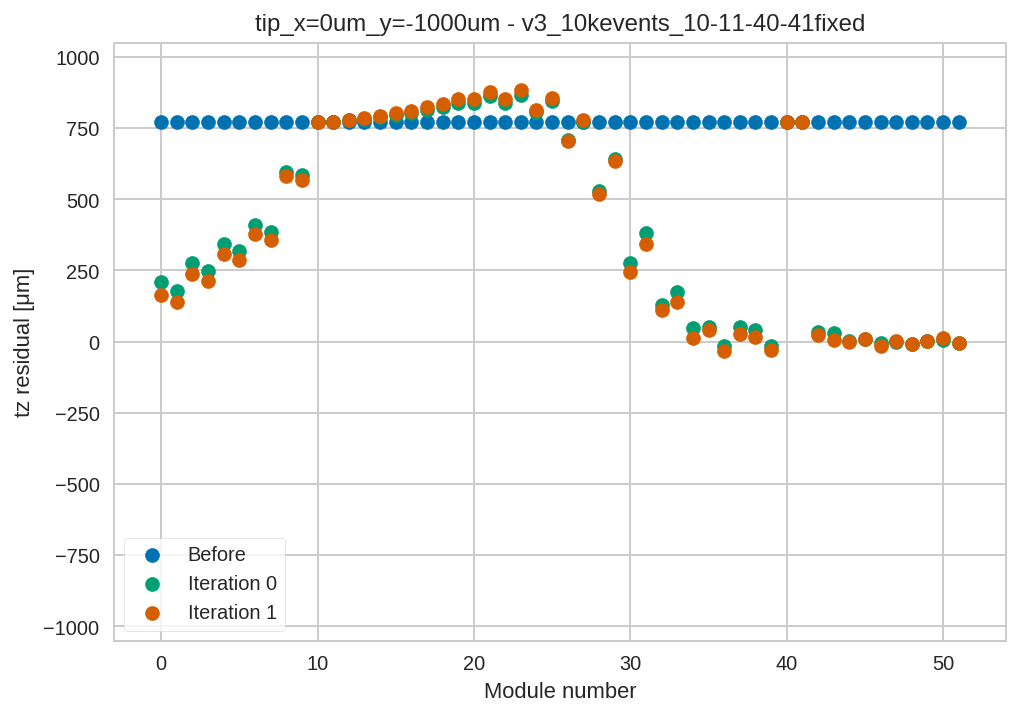

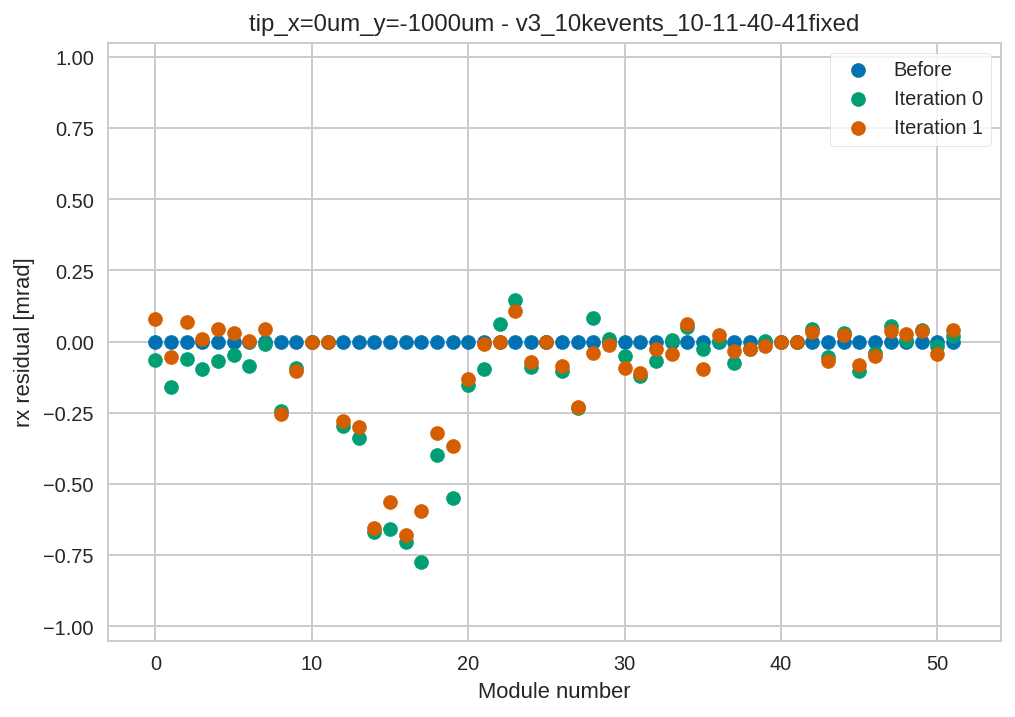

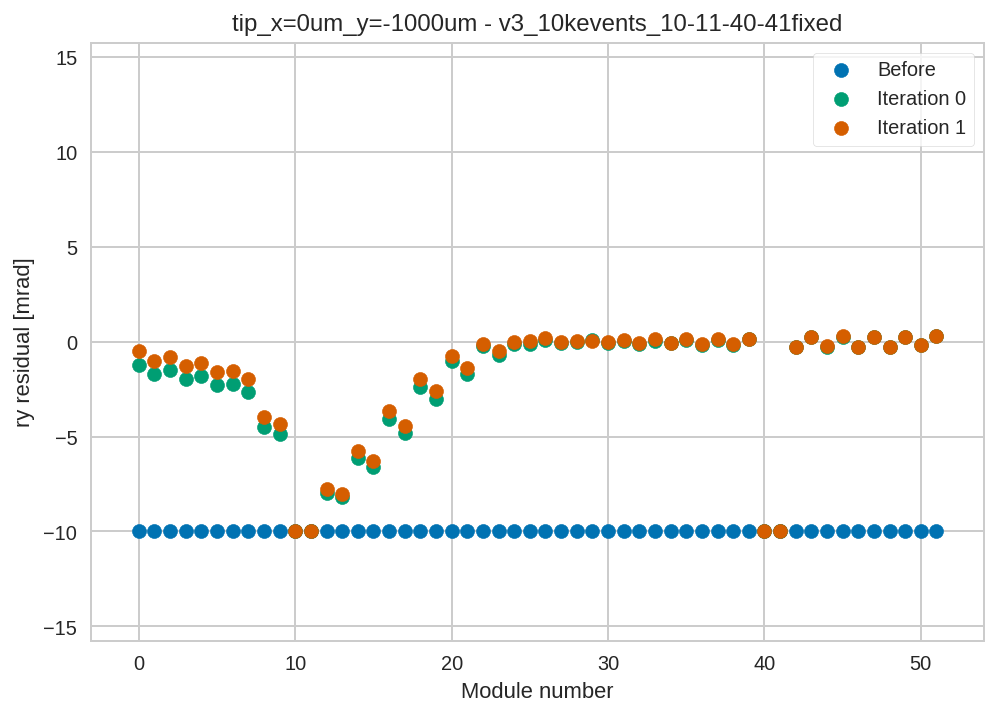

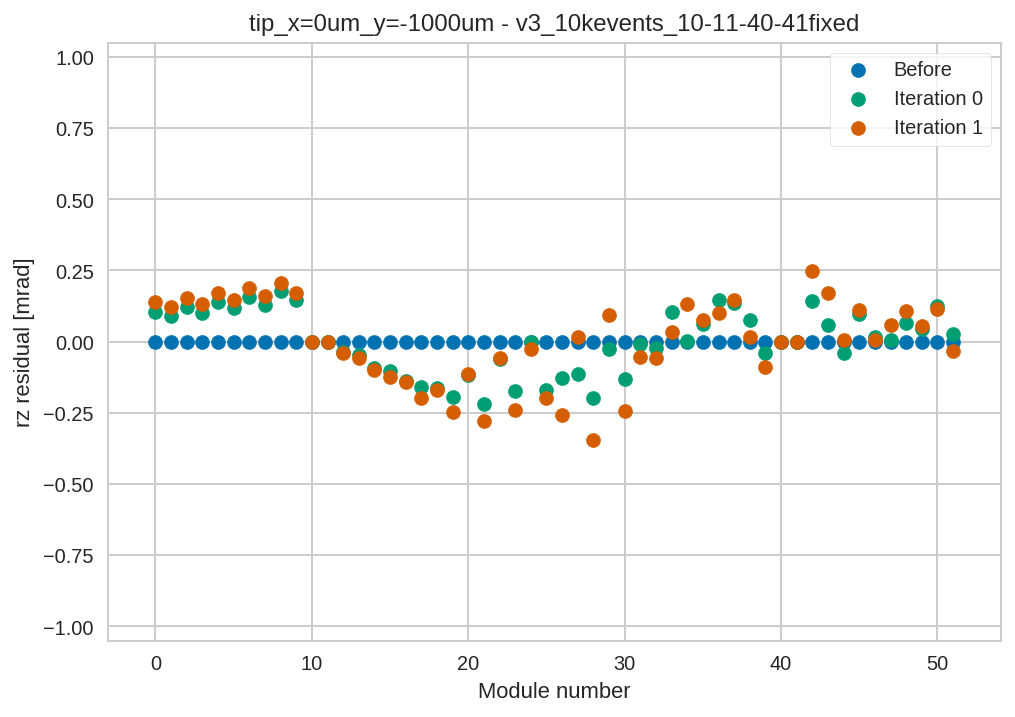

In [12]:
view_alignment('tip_x=0um_y=-1000um', 'v3_10kevents_10-11-40-41fixed', var='tx', n_iter=2)
view_alignment('tip_x=0um_y=-1000um', 'v3_10kevents_10-11-40-41fixed', var='ty', n_iter=2)
view_alignment('tip_x=0um_y=-1000um', 'v3_10kevents_10-11-40-41fixed', var='tz', n_iter=2)
view_alignment('tip_x=0um_y=-1000um', 'v3_10kevents_10-11-40-41fixed', var='rx', n_iter=2)
view_alignment('tip_x=0um_y=-1000um', 'v3_10kevents_10-11-40-41fixed', var='ry', n_iter=2)
view_alignment('tip_x=0um_y=-1000um', 'v3_10kevents_10-11-40-41fixed', var='rz', n_iter=2)

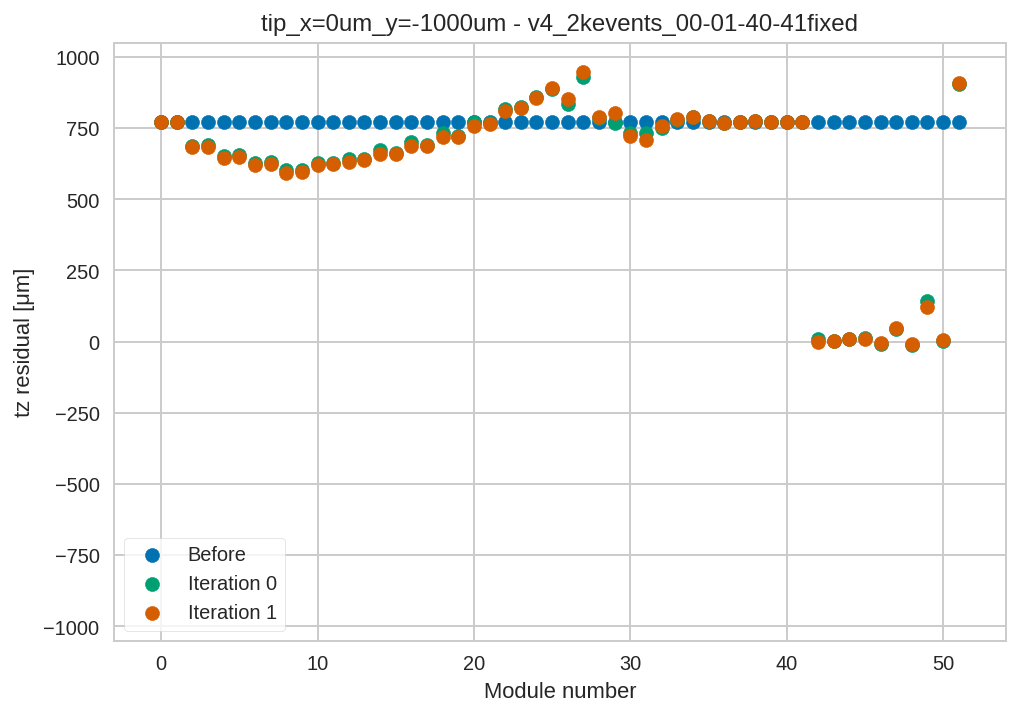

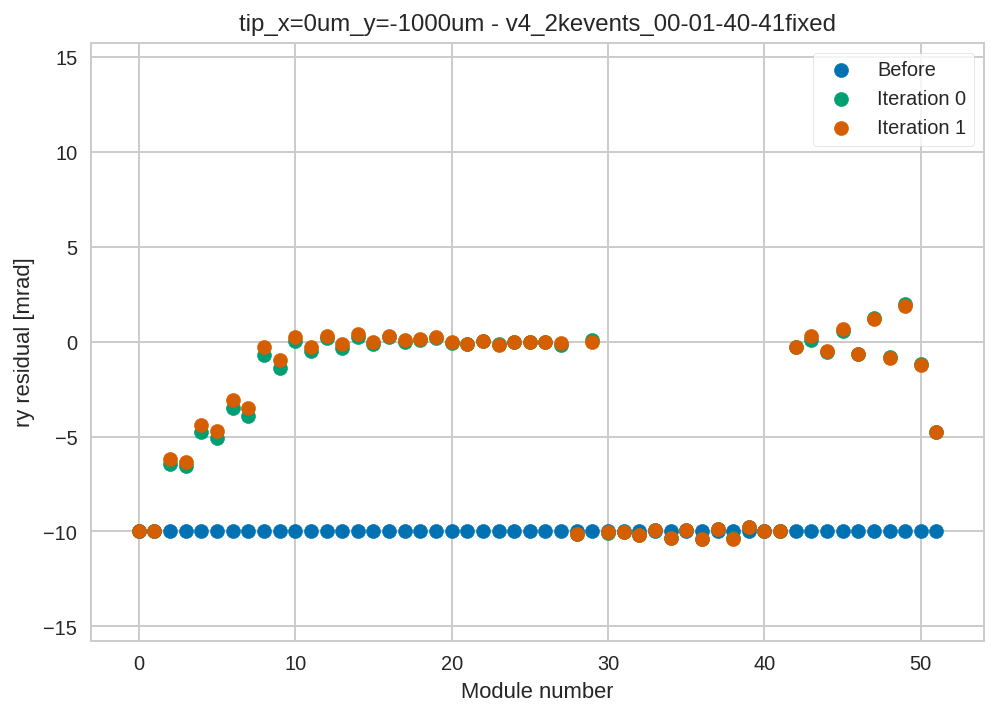

In [13]:
view_alignment('tip_x=0um_y=-1000um', 'v4_2kevents_00-01-40-41fixed', var='tz', n_iter=2)
view_alignment('tip_x=0um_y=-1000um', 'v4_2kevents_00-01-40-41fixed', var='ry', n_iter=2)

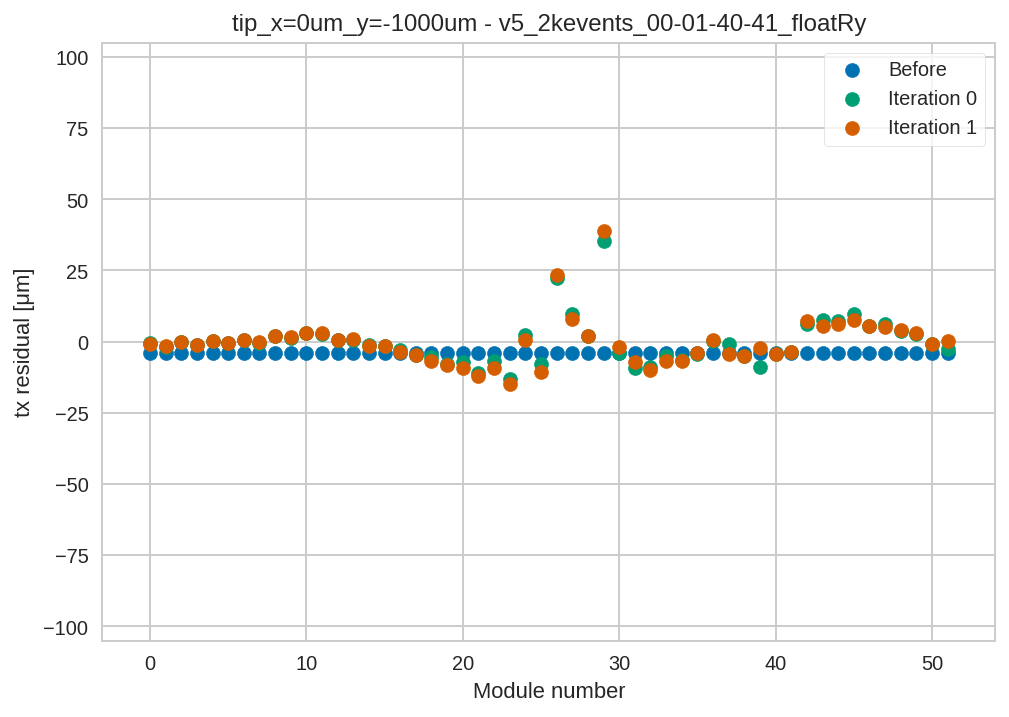

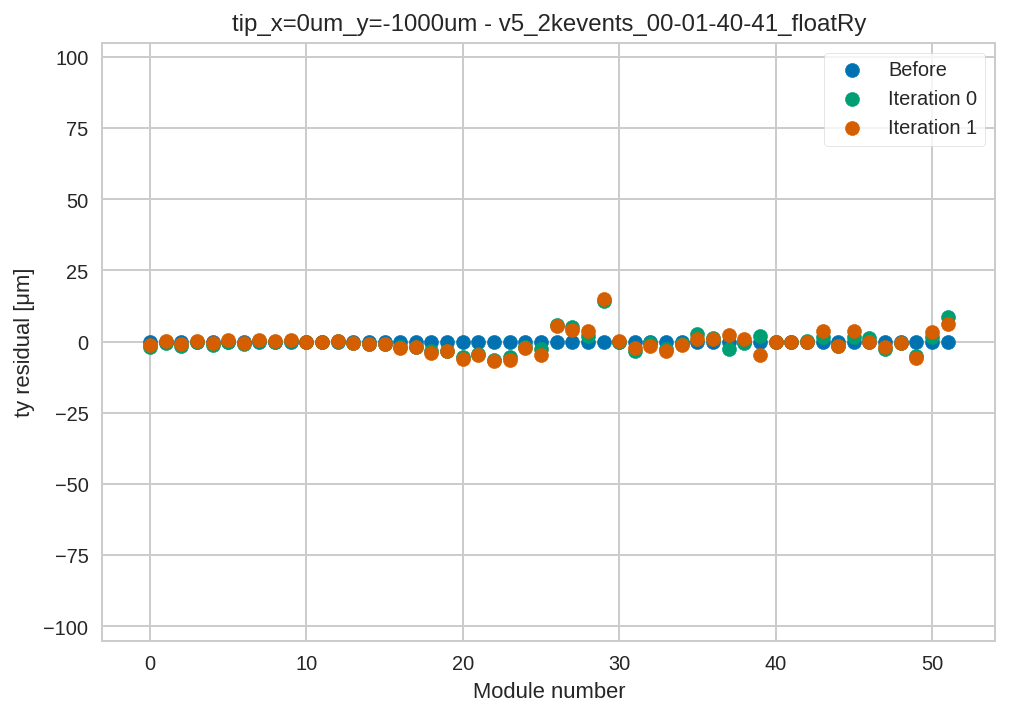

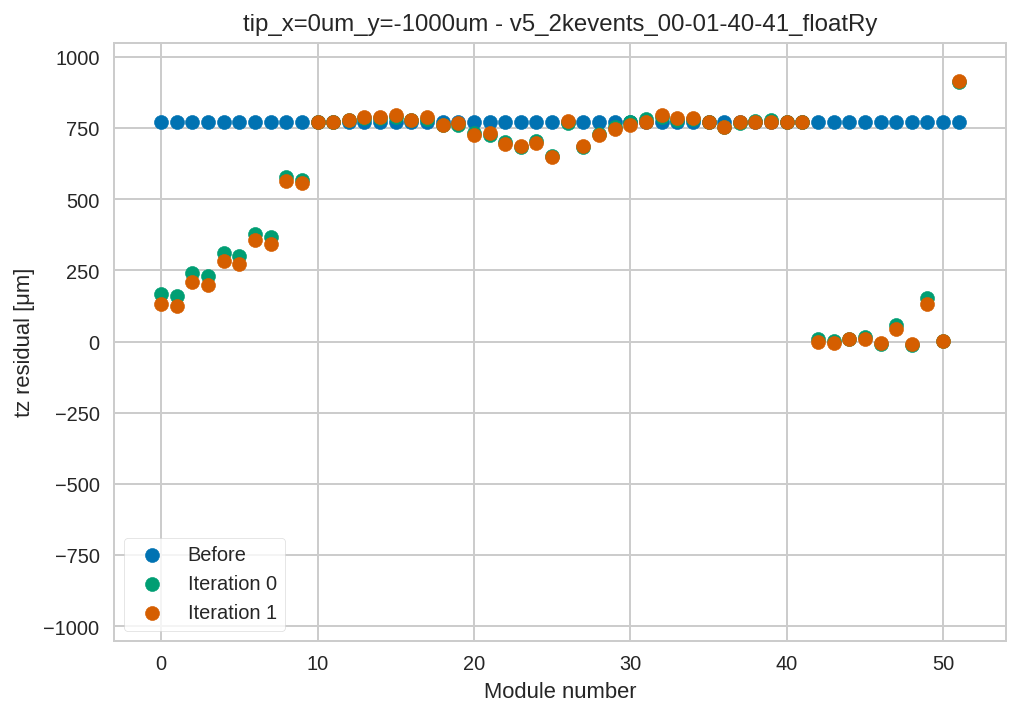

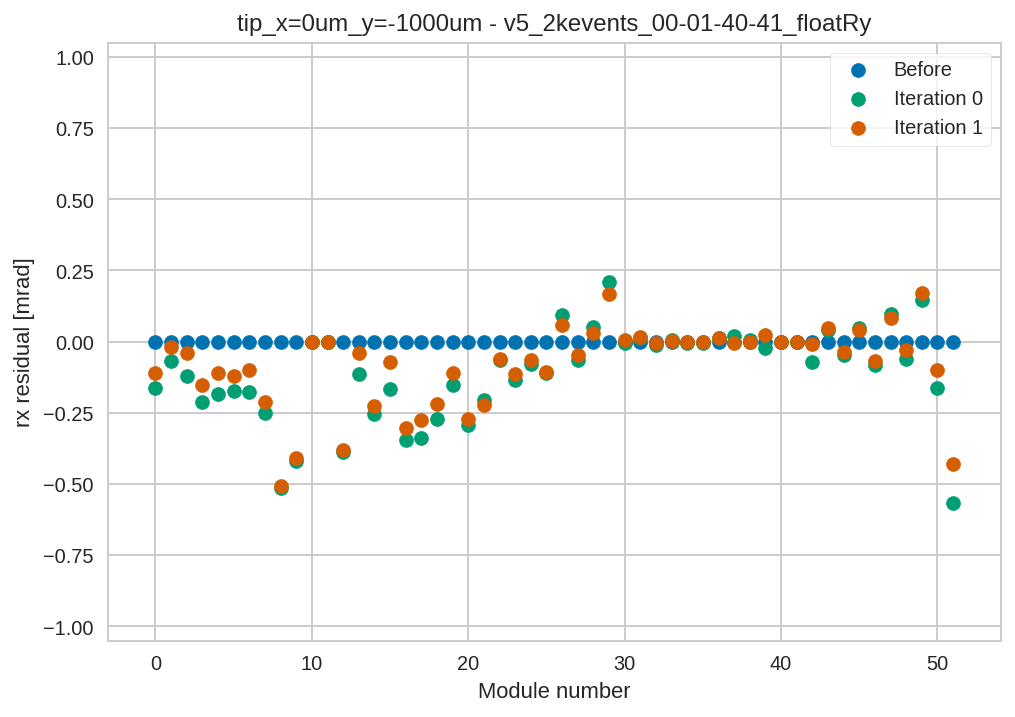

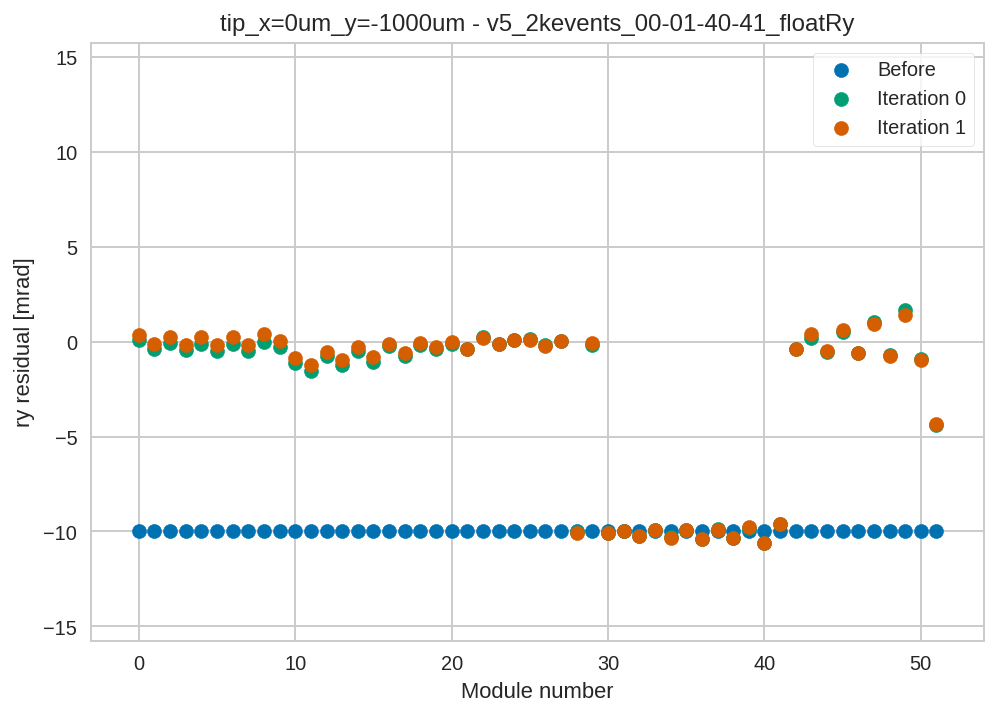

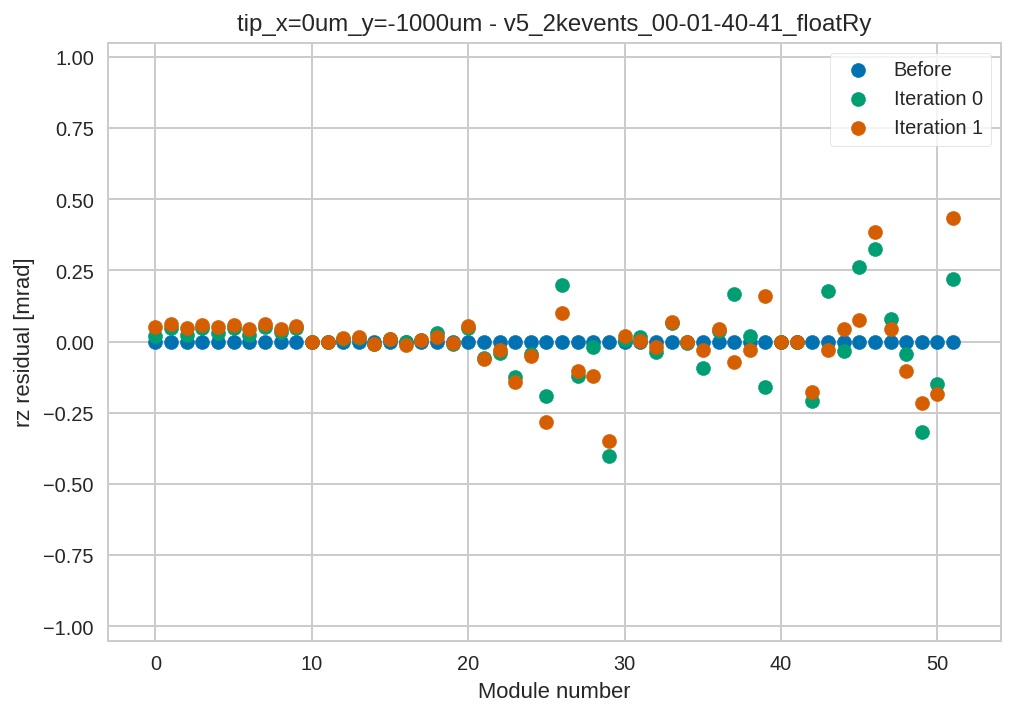

In [14]:
n_iter = 2
view_alignment('tip_x=0um_y=-1000um', 'v5_2kevents_00-01-40-41_floatRy', var='tx', n_iter=n_iter)
view_alignment('tip_x=0um_y=-1000um', 'v5_2kevents_00-01-40-41_floatRy', var='ty', n_iter=n_iter)
view_alignment('tip_x=0um_y=-1000um', 'v5_2kevents_00-01-40-41_floatRy', var='tz', n_iter=n_iter)
view_alignment('tip_x=0um_y=-1000um', 'v5_2kevents_00-01-40-41_floatRy', var='rx', n_iter=n_iter)
view_alignment('tip_x=0um_y=-1000um', 'v5_2kevents_00-01-40-41_floatRy', var='ry', n_iter=n_iter)
view_alignment('tip_x=0um_y=-1000um', 'v5_2kevents_00-01-40-41_floatRy', var='rz', n_iter=n_iter)

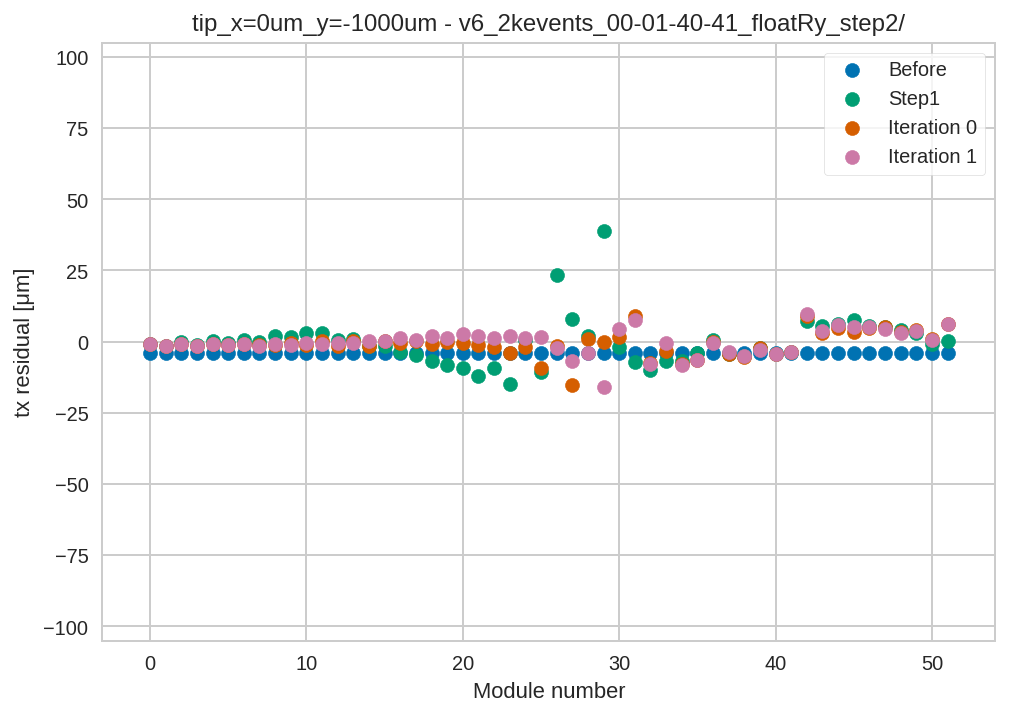

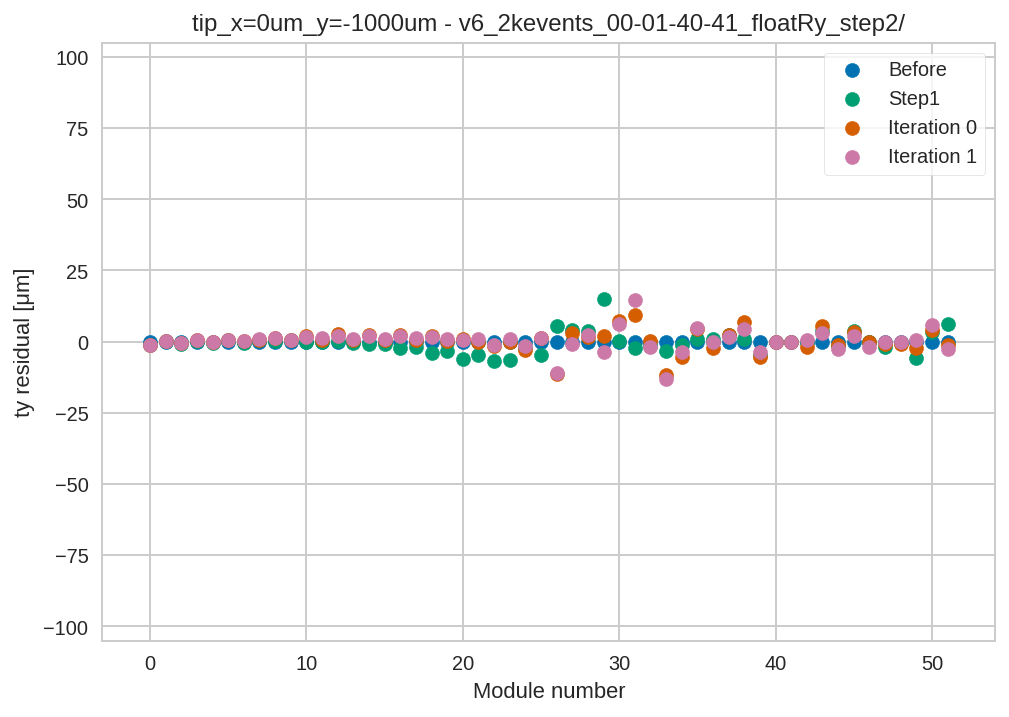

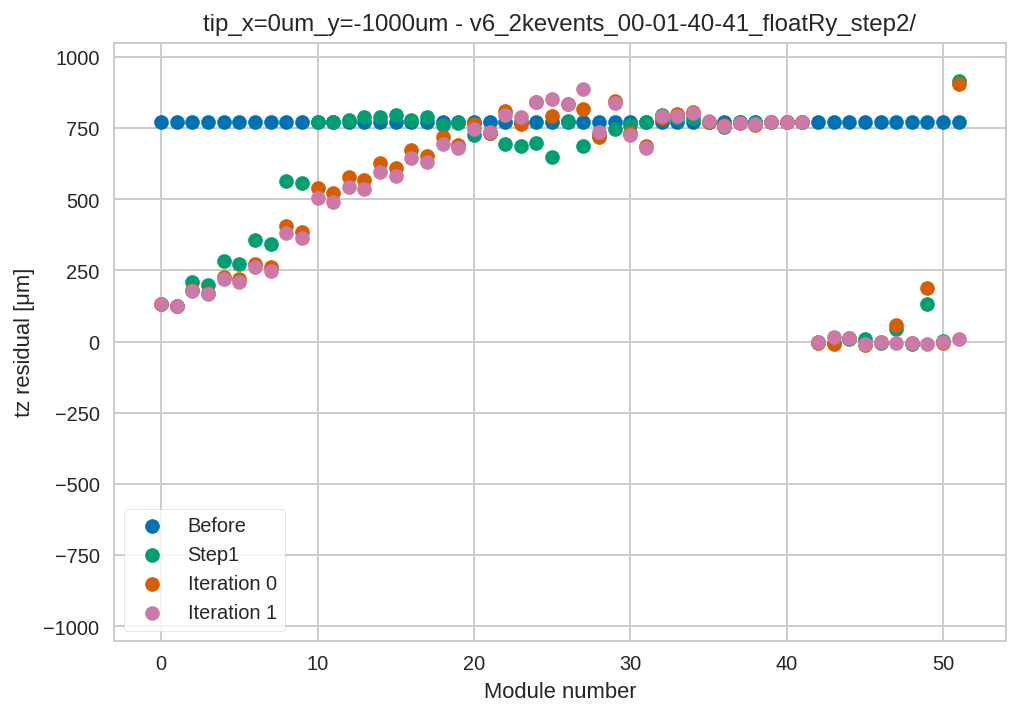

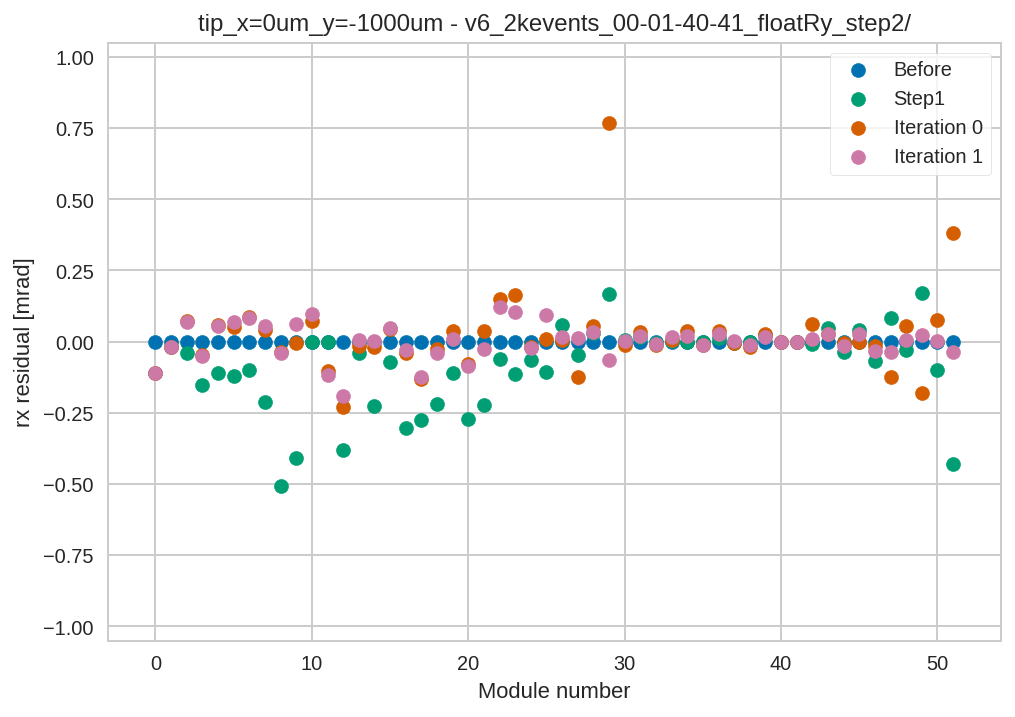

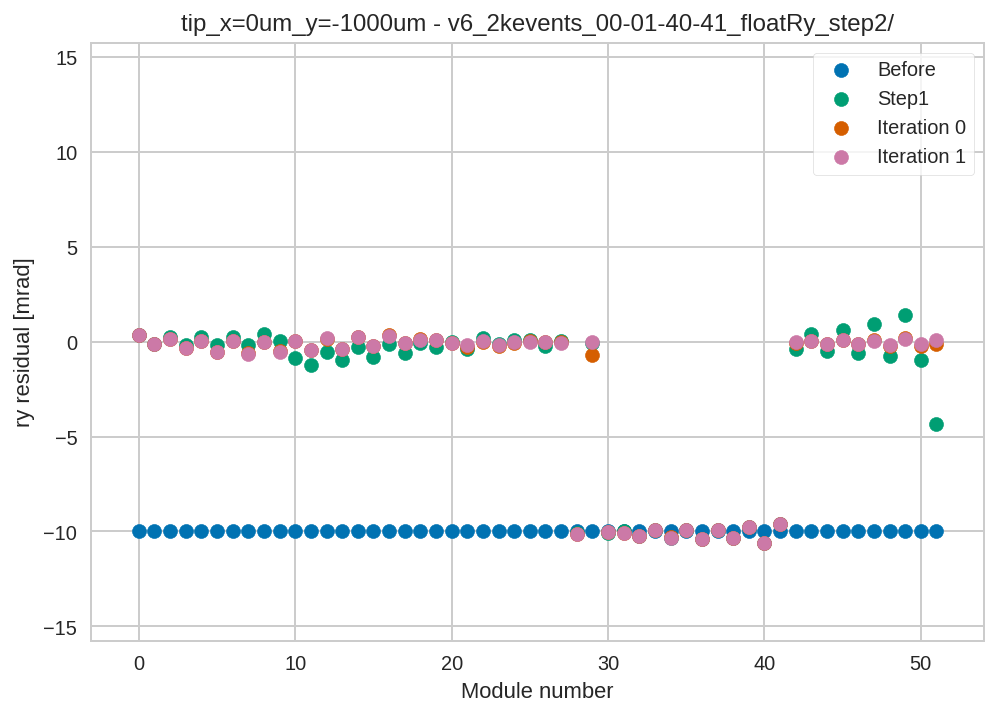

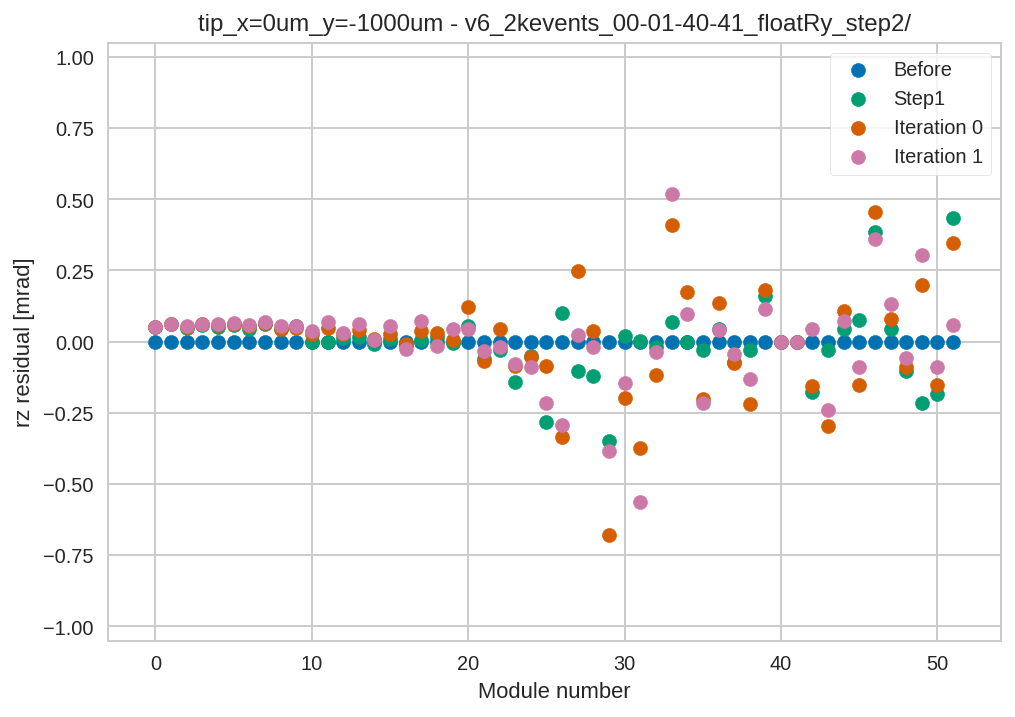

In [15]:
n_iter = 2
view_alignment('tip_x=0um_y=-1000um', 'v6_2kevents_00-01-40-41_floatRy_step2/', var='tx', n_iter=n_iter, show_step_1=True)
view_alignment('tip_x=0um_y=-1000um', 'v6_2kevents_00-01-40-41_floatRy_step2/', var='ty', n_iter=n_iter, show_step_1=True)
view_alignment('tip_x=0um_y=-1000um', 'v6_2kevents_00-01-40-41_floatRy_step2/', var='tz', n_iter=n_iter, show_step_1=True)
view_alignment('tip_x=0um_y=-1000um', 'v6_2kevents_00-01-40-41_floatRy_step2/', var='rx', n_iter=n_iter, show_step_1=True)
view_alignment('tip_x=0um_y=-1000um', 'v6_2kevents_00-01-40-41_floatRy_step2/', var='ry', n_iter=n_iter, show_step_1=True)
view_alignment('tip_x=0um_y=-1000um', 'v6_2kevents_00-01-40-41_floatRy_step2/', var='rz', n_iter=n_iter, show_step_1=True)

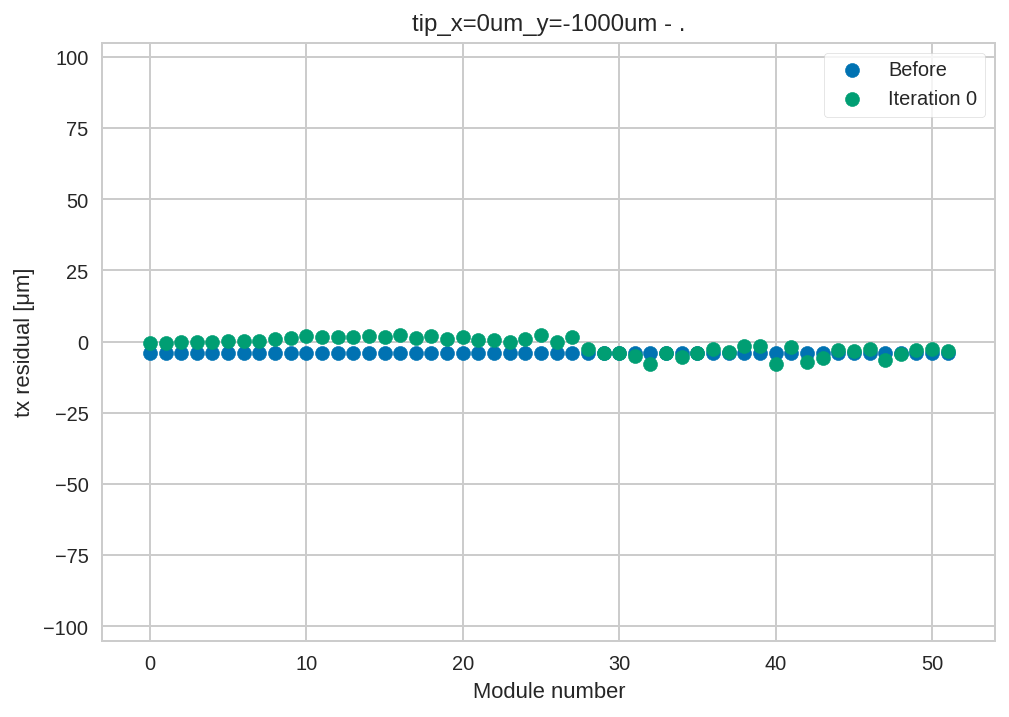

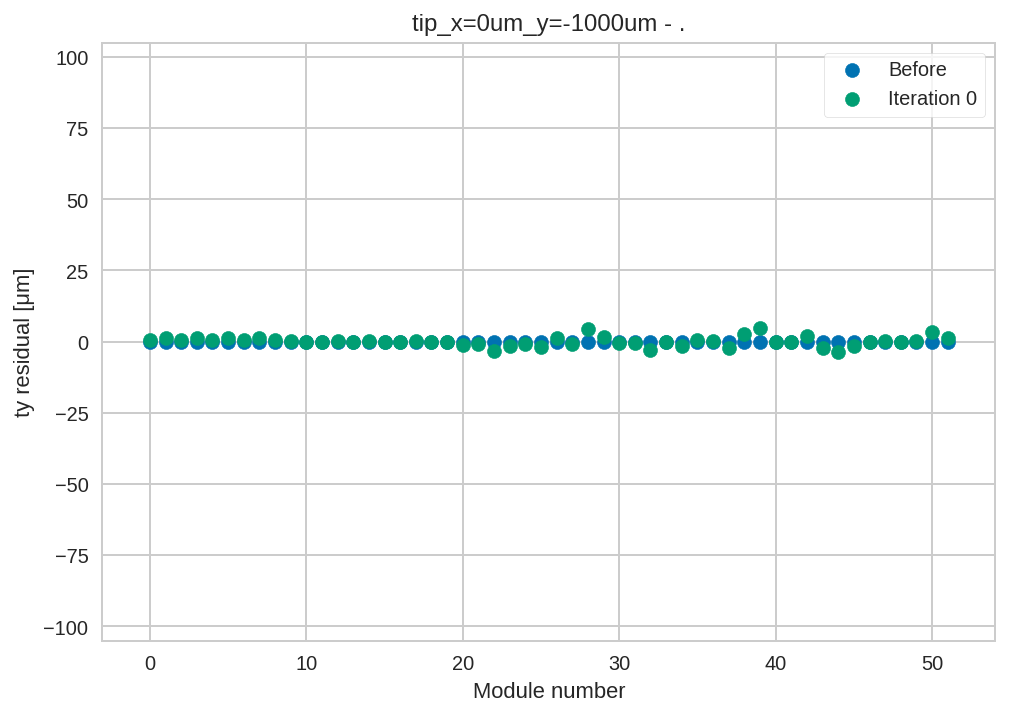

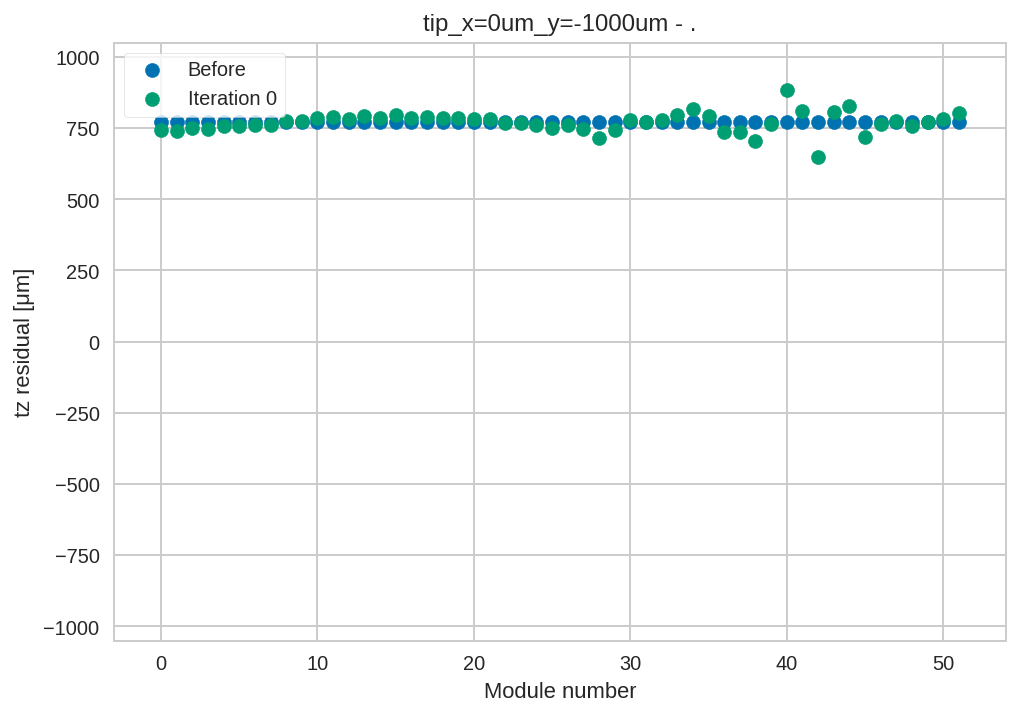

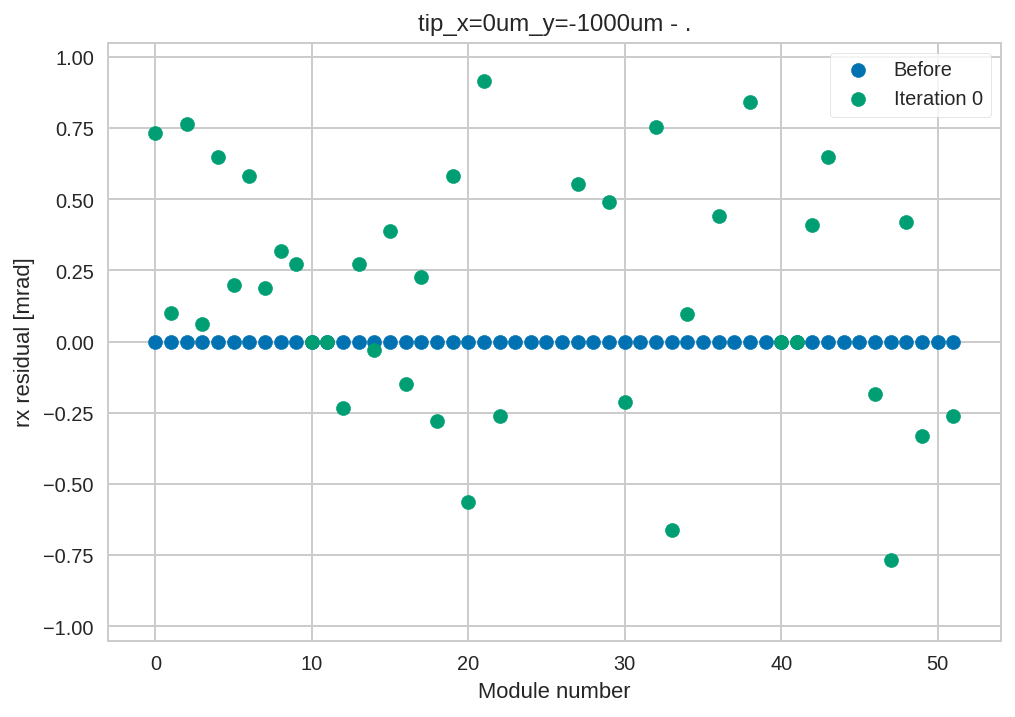

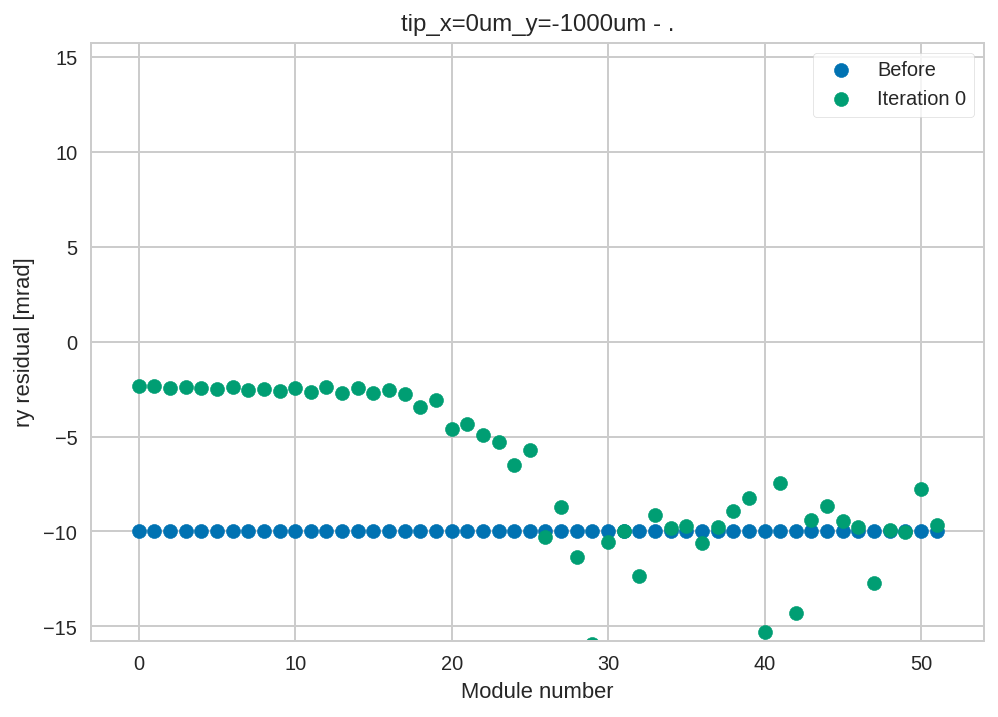

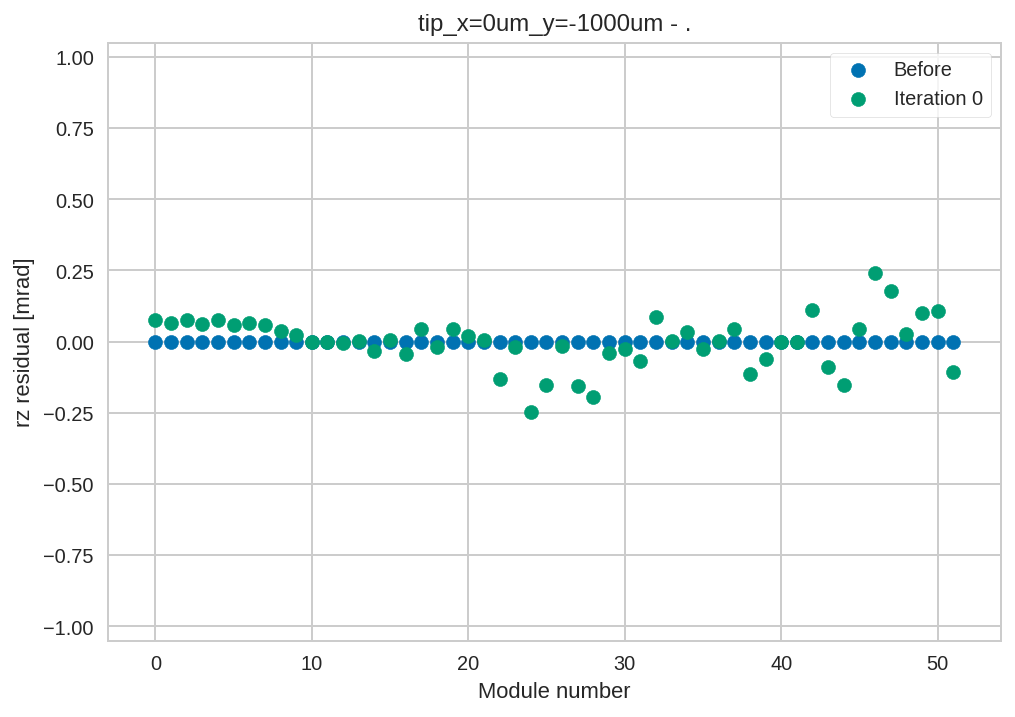

In [16]:
n_iter = 1
view_alignment('tip_x=0um_y=-1000um', '.', var='tx', n_iter=n_iter)
view_alignment('tip_x=0um_y=-1000um', '.', var='ty', n_iter=n_iter)
view_alignment('tip_x=0um_y=-1000um', '.', var='tz', n_iter=n_iter)
view_alignment('tip_x=0um_y=-1000um', '.', var='rx', n_iter=n_iter)
view_alignment('tip_x=0um_y=-1000um', '.', var='ry', n_iter=n_iter)
view_alignment('tip_x=0um_y=-1000um', '.', var='rz', n_iter=n_iter)

# Look at the histograms

Error - Skipped tip_x=0um_y=-1000um tx Iteration 5
Error - Skipped tip_x=0um_y=-1000um tx Iteration 6
Error - Skipped tip_x=0um_y=-1000um ty Iteration 5
Error - Skipped tip_x=0um_y=-1000um ty Iteration 6
Error - Skipped tip_x=0um_y=-1000um tz Iteration 5
Error - Skipped tip_x=0um_y=-1000um tz Iteration 6
Error - Skipped tip_x=0um_y=-1000um rx Iteration 5
Error - Skipped tip_x=0um_y=-1000um rx Iteration 6
Error - Skipped tip_x=0um_y=-1000um ry Iteration 5
Error - Skipped tip_x=0um_y=-1000um ry Iteration 6
Error - Skipped tip_x=0um_y=-1000um rz Iteration 5
Error - Skipped tip_x=0um_y=-1000um rz Iteration 6


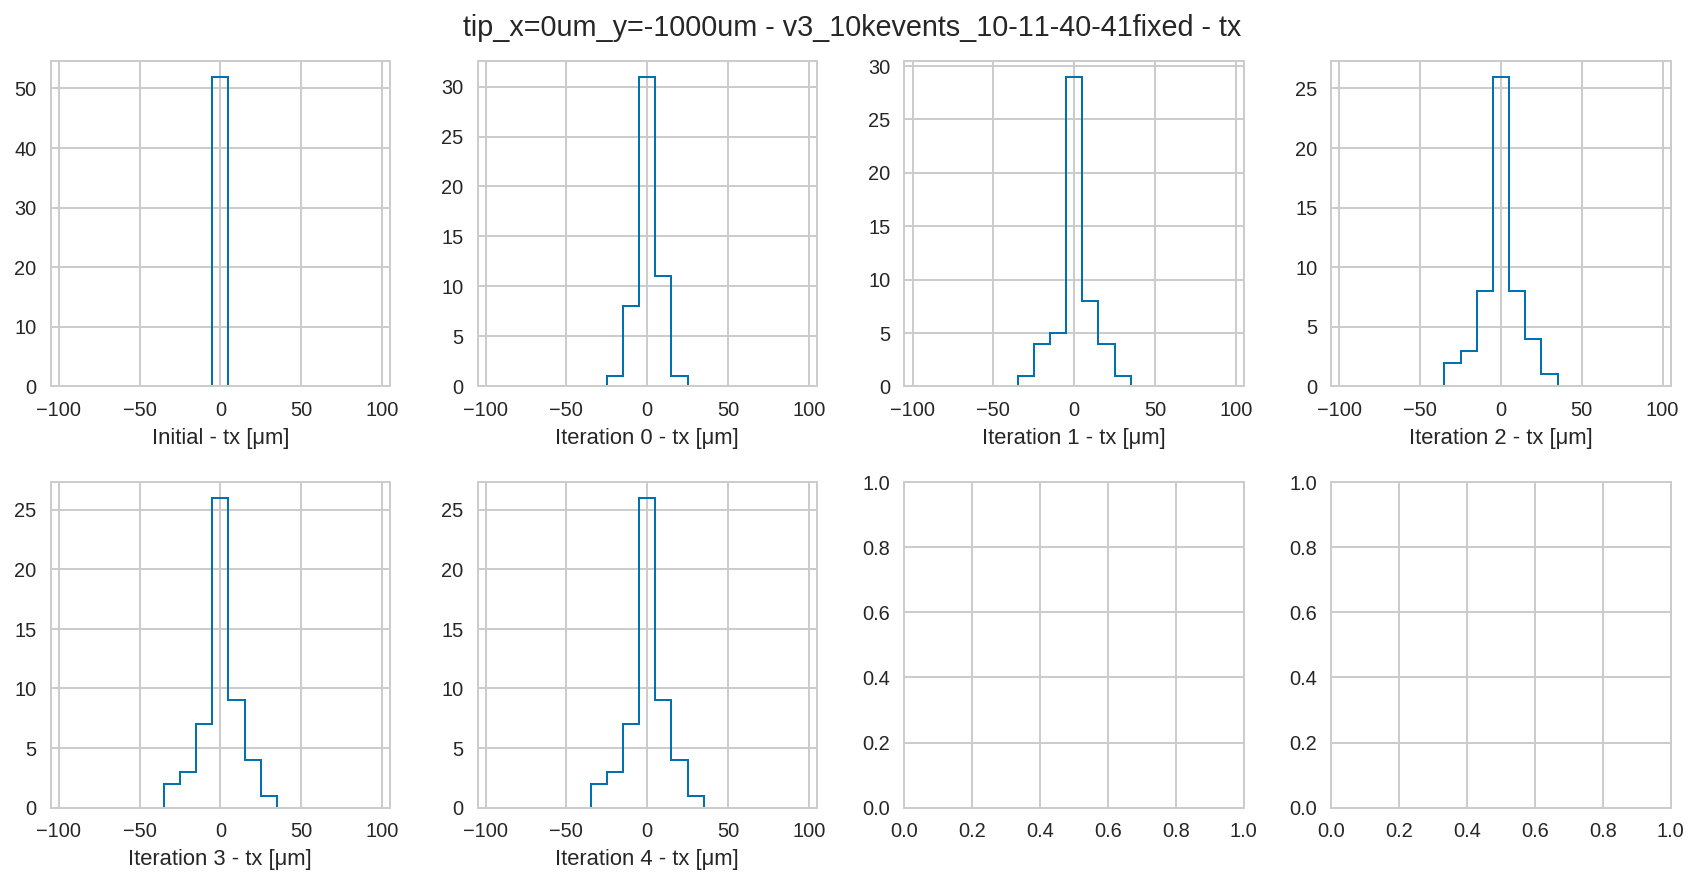

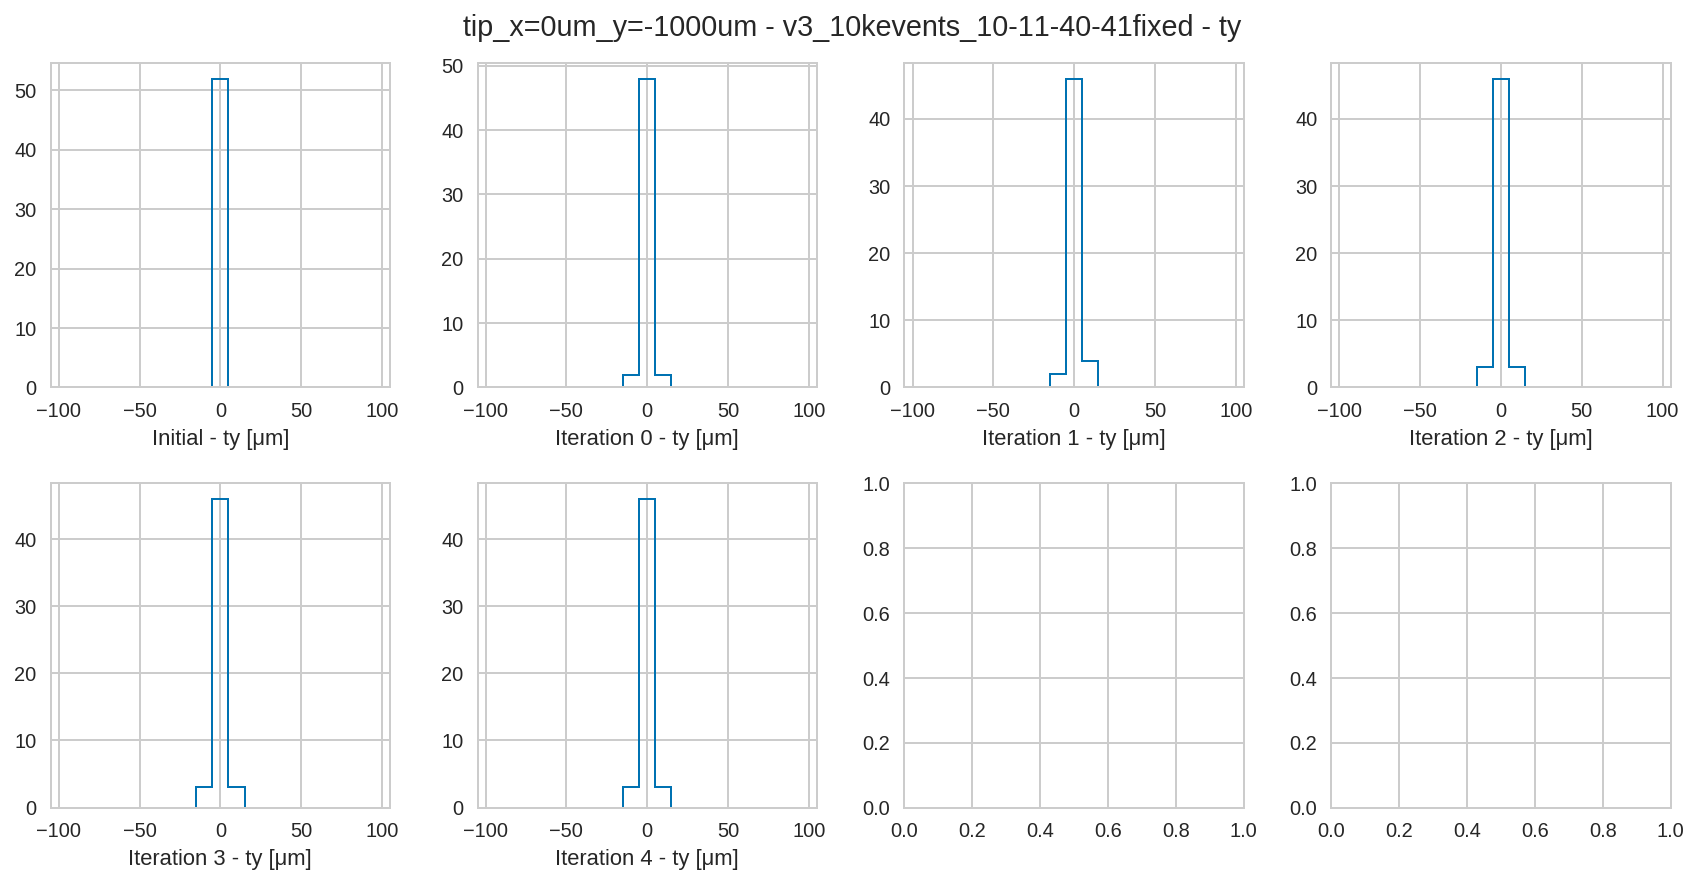

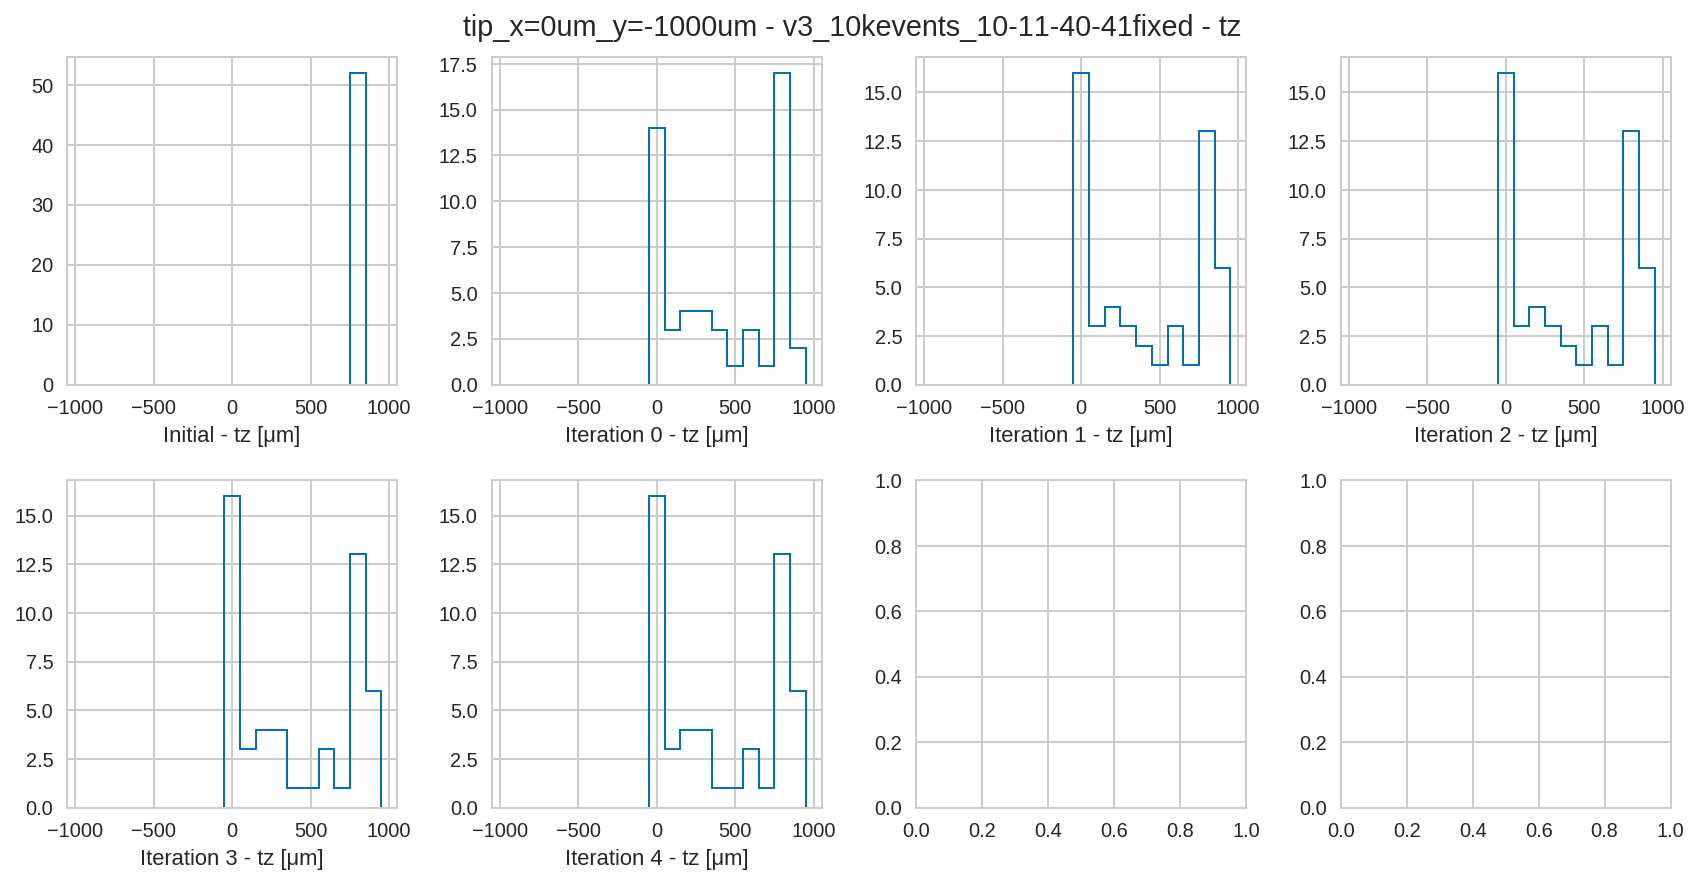

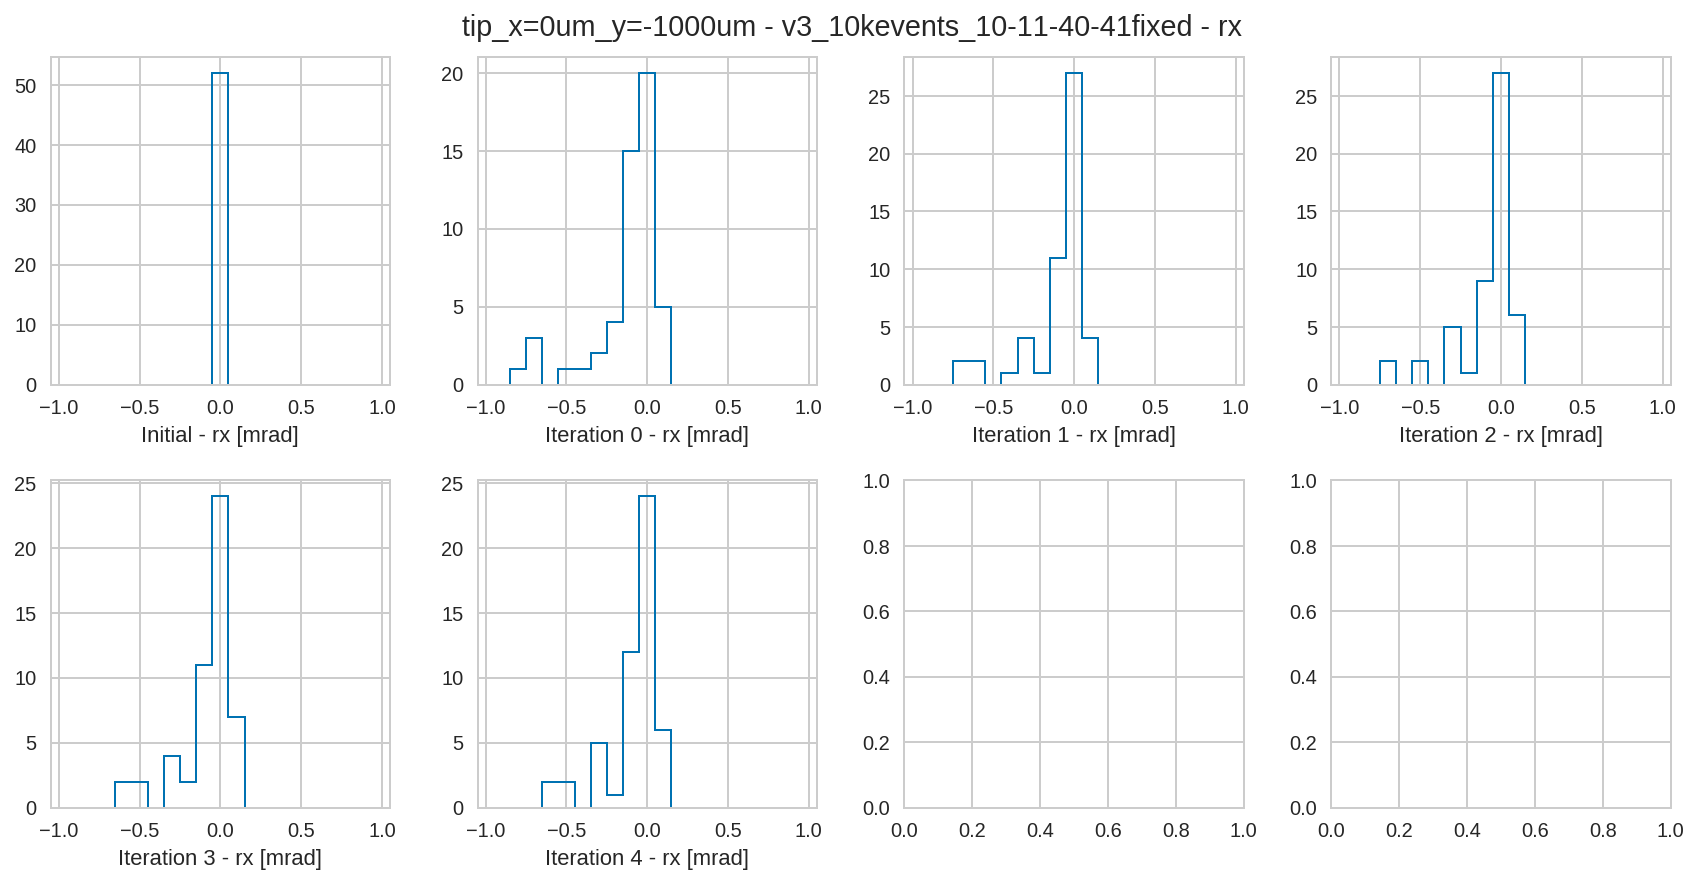

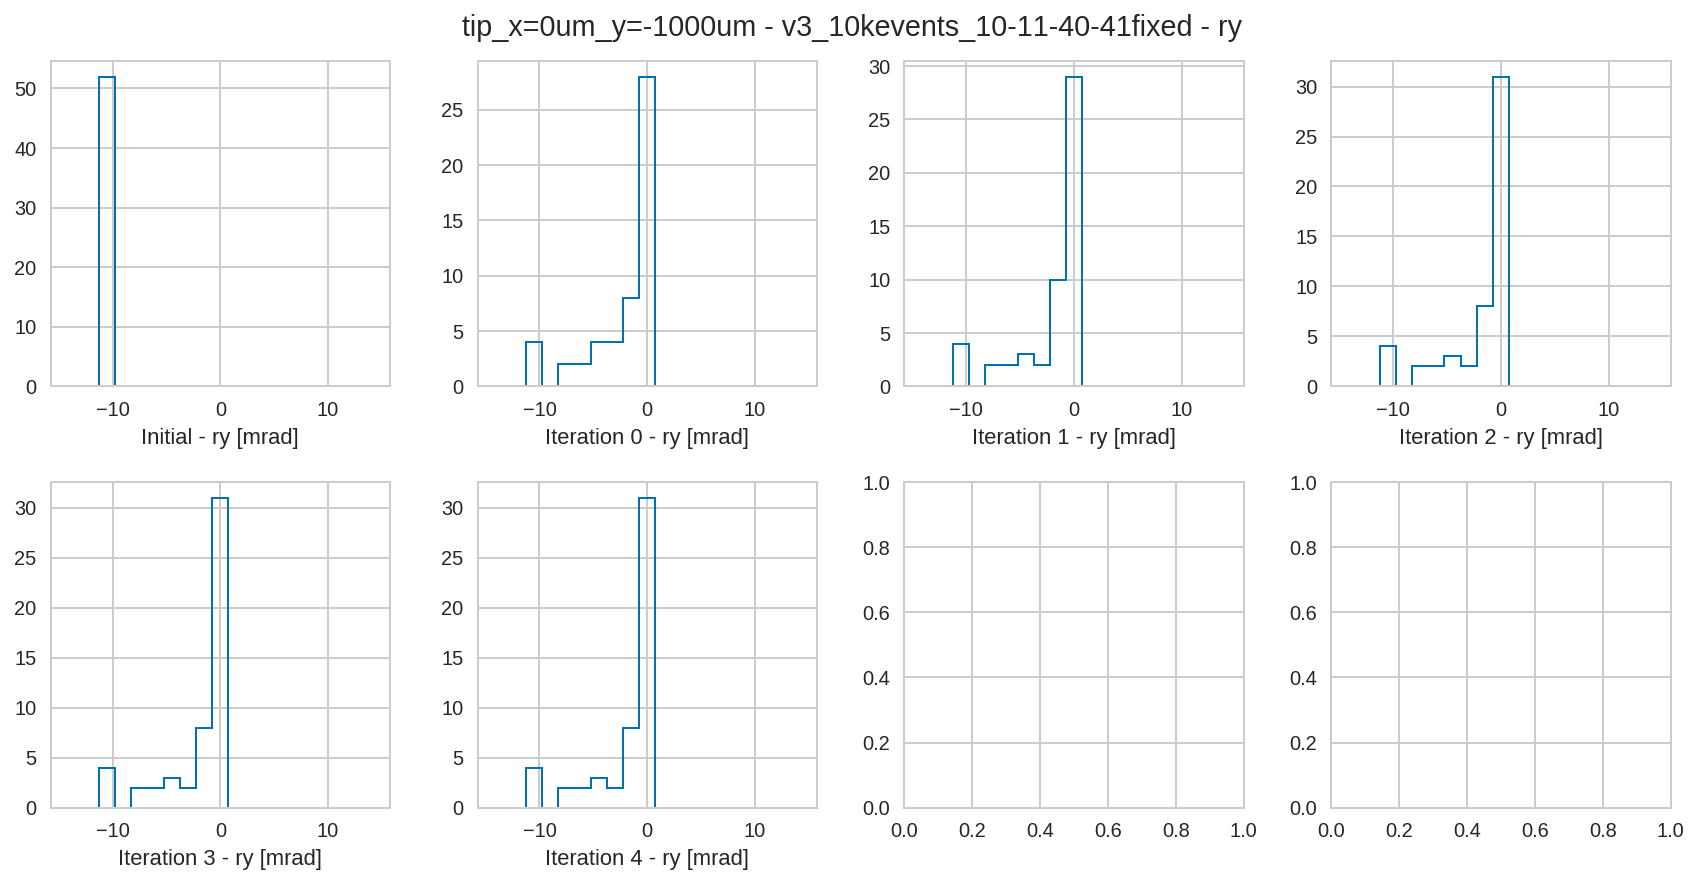

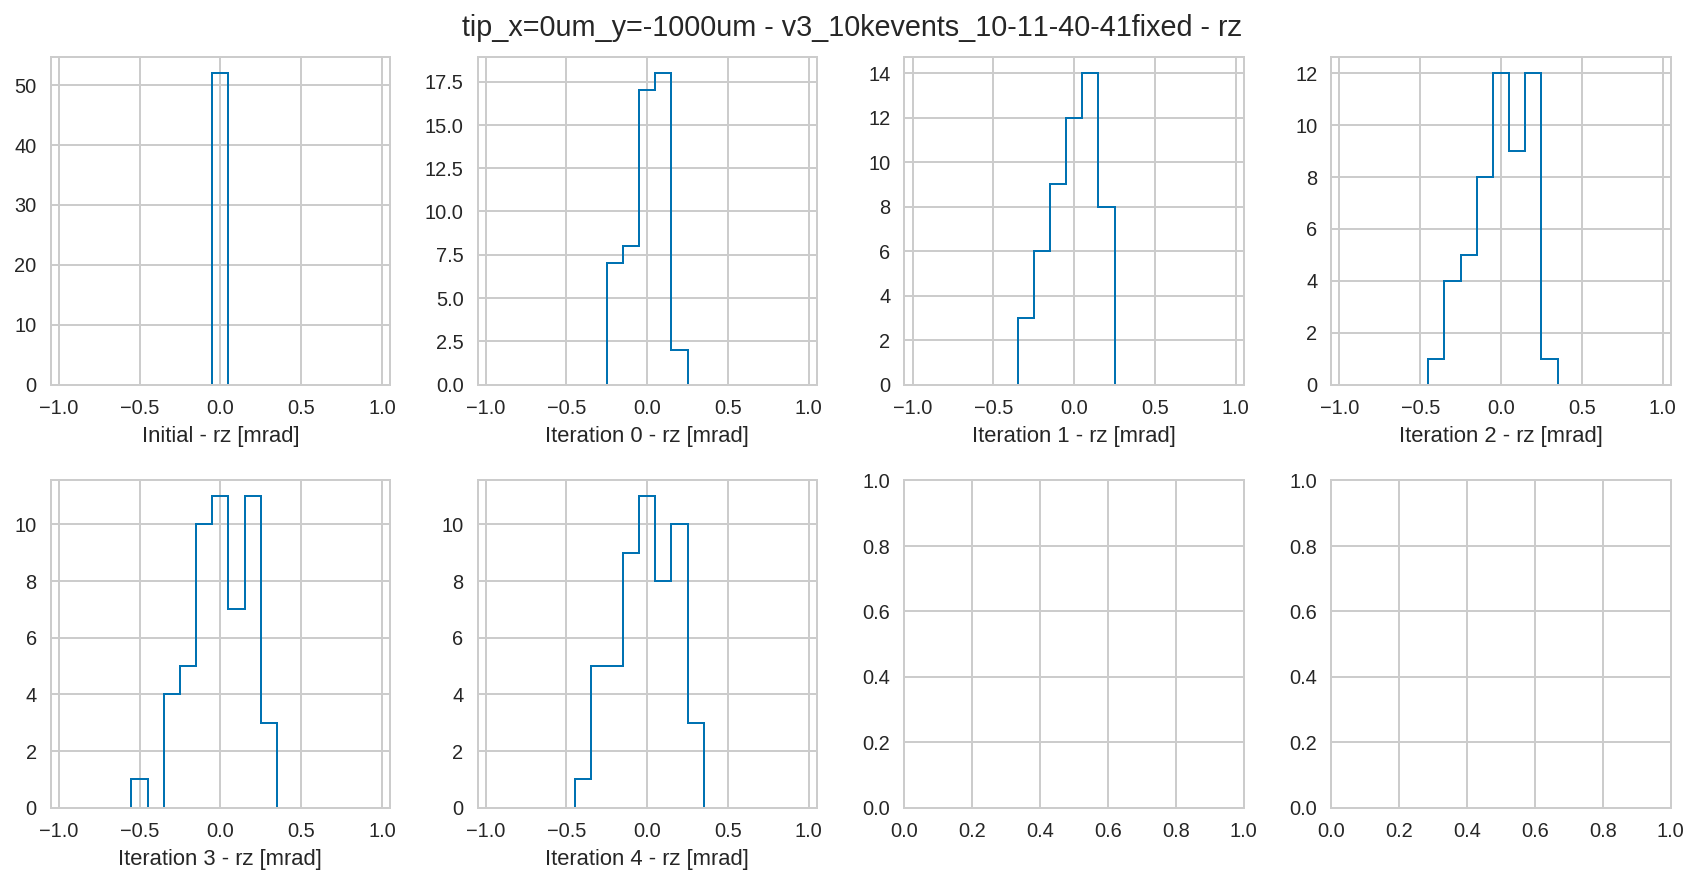

In [17]:
plot_hists('tip_x=0um_y=-1000um', 'v3_10kevents_10-11-40-41fixed')